In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [ ]:
#lending_club_info = pd.read_csv("../DATA/lending_club_info.csv")

In [ ]:
#lending_club_info

In [ ]:
df = pd.read_csv("../DATA/lending_club_loan_two.csv")

In [ ]:
df.head().transpose()

# EDA

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
px.histogram(df, x="loan_status")

In [ ]:
px.histogram(df, color="loan_status", x="annual_inc", nbins=100)

In [ ]:
# The graph above shows us that there is a strong disparitu regarding the annual income. Let's look at it deeper.

In [ ]:
px.box(df, x="loan_status", y="annual_inc")

In [ ]:
px.histogram(df[df["annual_inc"] < 1000000], color="loan_status", x="annual_inc", nbins=100)

In [ ]:
px.box(df[df["annual_inc"] < 1000000], x="loan_status", y="annual_inc")

In [ ]:
# What about the richest ?

In [ ]:
px.histogram(df[df["annual_inc"] >= 1000000], color="loan_status", x="annual_inc", nbins=100)

<a id='remove_high_incomes'></a>
note:

In [ ]:
# We may want to remove theses extreme annual income as there are few and may add noise to the model,
#despite the fact that there are information on loan status.

In [ ]:
px.histogram(df, x='loan_amnt', color='loan_status', nbins=50)

In [ ]:
# It shows that there is a barrier at 35k, the bank may not give more than that often.
#So the loan status over 45k should be better as we can imagine that the choice of the
#bank to lend or not is more thoughtful.

In [ ]:
charged = df[df["loan_status"] == "Charged Off"]

nb_unpaid_above_35 = charged["loan_amnt"][charged["loan_amnt"] > 35000].count()
total_above_35 = df["loan_amnt"][df["loan_amnt"] > 35000].count()
nb_unpaid_below_35 =charged["loan_amnt"][charged["loan_amnt"] <= 35000].count()
total_below_35 = df["loan_amnt"][df["loan_amnt"] <= 35000].count()
unpaid_above_35 = nb_unpaid_above_35 / total_above_35 * 100
unpaid_below_35 = nb_unpaid_below_35 / total_below_35 * 100

print("% of unpaid, for loan amount above 35k: {:.2f}%".format(unpaid_above_35))
print("% of unpaid, for loan amount below 35k: {:.2f}%".format(unpaid_below_35))

In [ ]:
nb_unpaid_below_35

In [ ]:
px.pie(values=[nb_unpaid_above_35, total_above_35], names=["Unpaid","Paid"],
      title="Loan amount above 35k")

In [ ]:
px.pie(values=[nb_unpaid_below_35, total_below_35], names=["Unpaid","Paid"],
      title="Loan amount below 35k")

In [ ]:
px.histogram(df, x='loan_amnt', color='loan_status', nbins=40, barnorm='percent')

In [ ]:
# Hypothesis is not verified ! In fact I took 35k as a limit and indeed there are less charged_off because of 
#the ratio above 36k. But 35k is NOT the boundary. The graph below shows us that the boundary is 36k

In [ ]:
px.scatter(df, x='annual_inc', y='loan_amnt', color='loan_status')

In [ ]:
charged = df[df["loan_status"] == "Charged Off"]

print("% of unpaid, for incomes above 1M: {:.2f}%".format(charged["annual_inc"][charged["annual_inc"] > 1000000].count() / df["annual_inc"][df["annual_inc"] > 1000000].count() * 100))
print("% of unpaid, for incomes below 1M: {:.2f}%".format(charged["annual_inc"][charged["annual_inc"] <= 1000000].count() / df["annual_inc"][df["annual_inc"] <= 1000000].count() * 100))

In [ ]:
df["loan_status"] = pd.get_dummies(df["loan_status"], drop_first=True)["Fully Paid"]

In [ ]:
df["loan_status"].head()

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True)

In [ ]:
data=df.corr()["loan_status"].sort_values().plot(kind='bar')

In [ ]:
# Nothing seems to be directly correlated with the output.
#Attention: some features need to be converted to dummies to appears in corr() function

In [ ]:
px.histogram(df, x="purpose", color="loan_status")

In [ ]:
px.histogram(df, x="purpose", color="loan_status", barnorm='percent')

In [ ]:
px.histogram(df, x="int_rate", color="loan_status", nbins=30)

In [ ]:
px.histogram(df, x="int_rate", color="loan_status", nbins=30, barnorm="percent")

<a id='remove_int_rate'></a>
note:

In [ ]:
# The higher the interest rate, he higher the risk.
#OR It is probably the inverse, Higher the risk, higher the interest rate.
# It is import as it could change the model if it is included or not.
#But if this data is computed from the other ones... Is there a need to keep it ?

# Cleaning

* [Remove high incomes](#remove_high_incomes) ?
* Missing values
* Deal with time
* Deal with adresses -> I think I'll remove it as even google does not find anything with those adresses
* [Remove interest rate](#remove_int_rate) ?

In [ ]:
df.head().transpose()

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isna()) # Can do the same with the lib: import missingno as msno

In [ ]:
df.info()

In [ ]:
import re
df["term"] = [int(re.search("([0-9]+)", term).group(0)) for term in df['term']]

In [ ]:
# lets give a number to each grade and rmeove redundant information in subgrade -> to be checked
m = [re.search("([A-Z])([0-9])", subgrade) for subgrade in df["sub_grade"]]
# Does subgrade letter is always equal to grade ?
if (len(set([m[i].group(1) == grade for i, grade in enumerate(df["grade"])])) != 1):
    raise ValueError("Some subgrade letters or not equal to the letter of the corresponding grade")

In [ ]:
df["sub_grade"] = [int(x.group(2)) for x in m]

In [ ]:
df["grade"] = [ord(x) for x in df["grade"]]

In [ ]:
set(df["emp_title"])

In [ ]:
# Let's drop it as there are too many things inside
df.drop("emp_title", axis=1, inplace=True)

In [ ]:
df["emp_length"].value_counts()

In [ ]:
len(df["emp_length"][df["emp_length"].isnull() == True])

In [ ]:
px.histogram(df, "emp_length", color="loan_status", barnorm="percent")

In [ ]:
# No need to keep it as there is no relations with status loan, let's drop it.
df.drop("emp_length", axis=1, inplace=True)

In [ ]:
set(df["home_ownership"])

In [ ]:
px.histogram(df, "home_ownership", color="loan_status", barnorm="percent")

In [ ]:
px.histogram(df, "home_ownership", color="loan_status")

In [ ]:
df["home_ownership"].value_counts()

In [ ]:
#Let's drop the input that have ANY, OTHER OR NONE as it has not any sense and it can influence the reuslt.
#For instance for an input entered with home_ownership=ANY, there is a 100% chance that the loan is paid -> This
#is an non-sense
df.drop(df[df["home_ownership"].isin(["NONE", "OTHER", "ANY"])].index, inplace=True)

In [ ]:
df["home_ownership"].value_counts()

In [ ]:
df = df.join(df["home_ownership"].str.get_dummies())

In [ ]:
df.drop("home_ownership", axis=1, inplace=True)

In [ ]:
df["verification_status"].value_counts()

In [ ]:
df = df.join(df["verification_status"].str.get_dummies())
df.drop("verification_status", axis=1, inplace=True)

In [ ]:
df["issue_d"].value_counts()

In [ ]:
import datetime

In [ ]:
df["issue_d_year"] = [datetime.datetime.strptime(date, "%b-%Y").year for date in df["issue_d"]]
df["issue_d_month"] = [datetime.datetime.strptime(date, "%b-%Y").month for date in df["issue_d"]]
df.drop("issue_d", axis=1, inplace=True)

In [ ]:
df["purpose"].value_counts()

In [ ]:
df = df.join(df["purpose"].str.get_dummies())
df.drop("purpose", inplace=True, axis=1)

In [ ]:
df.drop("title", inplace=True, axis=1)

In [ ]:
px.histogram(df[df["dti"] < 200], x="dti", color="loan_status", nbins=50)

In [ ]:
px.histogram(df, x="dti", color="loan_status", barnorm="percent")

In [ ]:
len(df[df["dti"] > 40])

In [ ]:
df.drop(df[df["dti"] > 40].index, inplace=True)

In [ ]:
df.info()

In [ ]:
df.drop("address", inplace=True, axis=1)

In [ ]:
df = df.join(pd.get_dummies(df["application_type"]))
df.drop("application_type", inplace=True, axis=1)

In [ ]:
df = df.join(pd.get_dummies(df["initial_list_status"]))
df.drop("initial_list_status", inplace=True, axis=1)

In [ ]:
df["earliest_cr_line_year"] = [datetime.datetime.strptime(date, "%b-%Y").year for date in df["earliest_cr_line"]]
df["earliest_cr_line_month"] = [datetime.datetime.strptime(date, "%b-%Y").month for date in df["earliest_cr_line"]]
df.drop("earliest_cr_line", inplace=True, axis=1)

In [ ]:
df = df.dropna() # This remove Nan for columns mort_acc and pub_rec_bankruptcies, BRUT FORCE -> we may can do better

# Deep learning

In [126]:
# Let's first try without removing int_rate or high annual_income as proposed at the beggining of the cleaning part.

In [128]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [129]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()

In [140]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.



In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
X_train.shape

(250356, 44)

In [136]:
model = Sequential()

In [146]:
model.add(Dense(units=40, activation="relu"))
model.add(Dense(units=21, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [147]:
early_stop = EarlyStopping(monitor="val_loss", patience=25, mode="min")

In [150]:
model.fit(x=X_train, y=y_train.values, batch_size=128, epochs=500, callbacks=[early_stop],
          validation_data=(X_test, y_test.values), verbose=1)

Train on 250356 samples, validate on 107296 samples
Epoch 1/500
250356/250356 [==============================] - 5s 21us/sample - loss: 0.4723 - val_loss: 0.4563
Epoch 2/500
250356/250356 [==============================] - 5s 18us/sample - loss: 0.4570 - val_loss: 0.4538
Epoch 3/500
250356/250356 [==============================] - 5s 18us/sample - loss: 0.4546 - val_loss: 0.4523
Epoch 4/500
250356/250356 [==============================] - 5s 18us/sample - loss: 0.4529 - val_loss: 0.4503
Epoch 5/500
250356/250356 [==============================] - 5s 18us/sample - loss: 0.4518 - val_loss: 0.4546
Epoch 6/500
250356/250356 [==============================] - 5s 18us/sample - loss: 0.4512 - val_loss: 0.4490
Epoch 7/500
250356/250356 [==============================] - 5s 19us/sample - loss: 0.4504 - val_loss: 0.4500
Epoch 8/500
250356/250356 [==============================] - 5s 19us/sample - loss: 0.4502 - val_loss: 0.4503
Epoch 9/500
250356/250356 [==============================] - 5s 19us

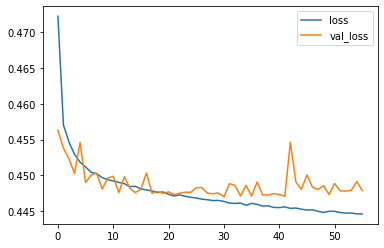

In [151]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()